# 6. PyTorch Classification

In [ ]:
# Check for gpu
!nvidia-smi

Sun Feb  2 12:06:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 10 samples of X:\n {X[:10]}")
print(f"First 10 samples of y:\n {y[:10]}")

First 10 samples of X:
 [[-0.03341062  0.4213911 ]
 [ 0.99882703 -0.4428903 ]
 [ 0.88959204 -0.32784256]
 [ 0.34195829 -0.41768975]
 [-0.83853099  0.53237483]
 [ 0.59906425 -0.28977331]
 [ 0.29009023 -0.2046885 ]
 [-0.03826868  0.45942924]
 [ 1.61377123 -0.2939697 ]
 [ 0.693337    0.82781911]]
First 10 samples of y:
 [1 1 1 1 0 1 1 1 1 0]


In [ ]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "Label":y})
data_df.head()

,X1,X2,Label
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


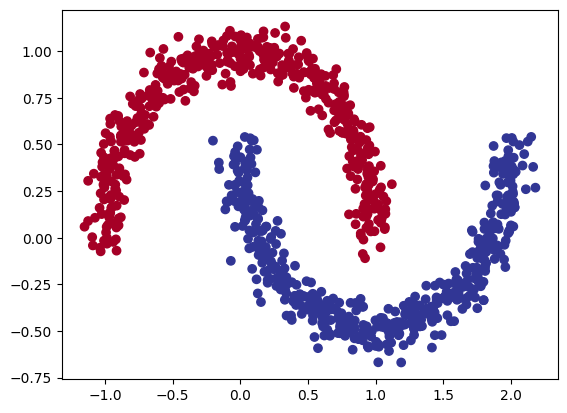

In [ ]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of the features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.03341062  0.4213911 ] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
# Turn data into tensors of dtype float
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
print(X[:10])
print("\n")
print(y[:10])
print("\n")

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

tensor([[-0.0334,  0.4214],
        [ 0.9988, -0.4429],
        [ 0.8896, -0.3278],
        [ 0.3420, -0.4177],
        [-0.8385,  0.5324],
        [ 0.5991, -0.2898],
        [ 0.2901, -0.2047],
        [-0.0383,  0.4594],
        [ 1.6138, -0.2940],
        [ 0.6933,  0.8278]])


tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])




(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
      super().__init__()

      self.layer1 = nn.Linear(in_features=in_features, out_features=hidden_units)
      self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
      self.layer3 = nn.Linear(in_features=hidden_units, out_features=out_features)
      self.relu = nn.ReLU()  # ReLU() is a non-linear activation function


    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# Instantiate the model
model_0 = MoonModelV0(in_features=2, out_features=1, hidden_units=10)
model_0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.3682, -0.6879],
                      [ 0.6553,  0.5077],
                      [-0.5277, -0.6392],
                      [ 0.6073, -0.3885],
                      [-0.3648,  0.0832],
                      [-0.6338,  0.0729],
                      [ 0.5256, -0.4281],
                      [ 0.1683,  0.5897],
                      [-0.4105,  0.3477],
                      [-0.2469, -0.6159]])),
             ('layer1.bias',
              tensor([-0.3914, -0.4091, -0.3418,  0.6332,  0.2361,  0.3004, -0.5049,  0.2628,
                       0.1615,  0.5330])),
             ('layer2.weight',
              tensor([[ 0.2696,  0.1690,  0.2654, -0.2231, -0.0169, -0.2058, -0.1453,  0.2327,
                       -0.0741, -0.1755],
                      [-0.3035,  0.0784, -0.0437, -0.2659, -0.0520, -0.2286,  0.0684, -0.2062,
                       -0.2297, -0.2849],
                      [ 0.1699, -0.2965,  0.0276,  0.1972,  0.1653,  0.2415

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()   # Sigmoid layer built in
# loss_fn = nn.BCELoss()  -> requires the sigmoid layer

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# What's coming out of our model?

model_0.to(device)
# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction labels
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.1608, 0.2763, 0.2718, 0.2677, 0.2196, 0.2683, 0.2134, 0.2323, 0.2332,
        0.2637], device='cuda:0', grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5401, 0.5686, 0.5675, 0.5665, 0.5547, 0.5667, 0.5531, 0.5578, 0.5580,
        0.5656], device='cuda:0', grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       grad_fn=<RoundBackward0>)


In [ ]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

# TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.4 MB/s eta 0:00:00


MulticlassAccuracy()

**NOTE:** Accuracy function can also be created manually by:

In [ ]:
# def accuracy_fn(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item()
#   acc = (correct/len(y_pred))*100
#   return acc

In [ ]:
# TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs+1):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # logits -> pred probs -> pred labels

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients (optimizer zero grad)
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()


  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f} | Test Loss: {test_loss:.2f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.71, Acc: 0.50 | Test Loss: 0.71, Test Acc: 0.50
Epoch: 100 | Loss: 0.45, Acc: 0.84 | Test Loss: 0.46, Test Acc: 0.83
Epoch: 200 | Loss: 0.23, Acc: 0.89 | Test Loss: 0.24, Test Acc: 0.90
Epoch: 300 | Loss: 0.20, Acc: 0.91 | Test Loss: 0.19, Test Acc: 0.92
Epoch: 400 | Loss: 0.16, Acc: 0.93 | Test Loss: 0.16, Test Acc: 0.94
Epoch: 500 | Loss: 0.12, Acc: 0.95 | Test Loss: 0.12, Test Acc: 0.95
Epoch: 600 | Loss: 0.07, Acc: 0.98 | Test Loss: 0.07, Test Acc: 0.99
Epoch: 700 | Loss: 0.04, Acc: 0.99 | Test Loss: 0.04, Test Acc: 1.00
Epoch: 800 | Loss: 0.03, Acc: 1.00 | Test Loss: 0.03, Test Acc: 1.00
Epoch: 900 | Loss: 0.02, Acc: 1.00 | Test Loss: 0.02, Test Acc: 1.00
Epoch: 1000 | Loss: 0.02, Acc: 1.00 | Test Loss: 0.01, Test Acc: 1.00


*From the 2nd accuracy_fn we created we could write:*

* `Train accuracy would be`

acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

* `Test accuracy would be`

test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1   # Takes 1st col of x-axis -> adds padding to sides otherwise data points would sit right at the plot's edge, which doesn’t look clean
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1   # Takes 2nd col of x-axis -> adds padding to sides otherwise data points would sit right at the plot's edge, which doesn’t look clean
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), # 101 points = 100 intervals between them -> generate 101 evenly spaced points between x_min and x_max
                         np.linspace(y_min, y_max, 101)) # np.meshgrid: Creates a grid of coordinates covering the entire plot area

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float() # ravel converts 2d array to 1d array (flattens)
    # np.column_stack((xx.ravel(), yy.ravel())): Purpose: Combines the flattened xx and yy into coordinate pairs. Example: np.column_stack(([0, 1, 2], [3, 4, 5]))→ [[0, 3],[1, 4],[2, 5]]
    # torch.from_numpy(ndarray) → Tensor: Creates a Tensor from a numpy.ndarray
    # .float(): Ensures the data type is float32, which is compatible with most PyTorch models

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    '''
    Multi-class (more than 2 classes):
      Apply Softmax → Get probabilities for all classes → Use Argmax to pick the class with the highest probability.
    Binary (2 classes):
      Apply Sigmoid → Get probability for class 1 → Use Round to classify as 0 or 1.
    '''

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

'''
y_pred contains predicted class labels for each point in the grid created earlier.
Why reshape(xx.shape)?
xx and yy define a 2D grid (like a matrix) of shape (101, 101).
Since predictions are originally a flat vector (1D), reshaping aligns them with this grid for proper plotting.
detach().numpy():
detach() removes the tensor from PyTorch’s computational graph (no gradient tracking needed).
.numpy() converts the tensor to a NumPy array for compatibility with Matplotlib.

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
This line is responsible for plotting the decision boundary of the model, using a filled contour plot to visualize different regions in the feature space based on the model's predictions.
plt.contourf()
This stands for "contour fill".
It creates filled contour plots, which are like heatmaps but with smooth transitions between regions instead of sharp boundaries.
It helps visualize the areas where the model predicts different classes.
xx, yy
These are 2D grid coordinates created using np.meshgrid().
xx contains all the x-coordinates, and yy contains all the y-coordinates for the grid.
Together, they define the grid structure over which the decision boundary is plotted.
y_pred
This contains the predicted class labels for each point in the grid defined by xx and yy.
Shape of y_pred: It’s reshaped to match xx.shape so that each grid coordinate (xx, yy) has a corresponding class prediction.
cmap=plt.cm.RdYlBu
cmap specifies the color map to use for coloring the regions.
RdYlBu stands for Red-Yellow-Blue, meaning:
Red for one class
Yellow for intermediate values (if any, e.g., in multi-class)
Blue for another class
This makes it easy to visually distinguish between classes.
alpha=0.7
Controls the transparency of the filled contour plot.
alpha=1.0 = fully opaque, alpha=0.0 = fully transparent.
0.7 means it's slightly transparent so that the underlying scatter plot (data points) remains visible.

X[:, 0] and X[:, 1]: These are the actual data points in the dataset, plotted as scatter points on the graph.
xx contains the x-values of all the grid points in the plot.
yy contains the y-values of all the grid points in the plot.

plt.xlim(xx.min(), xx.max())
plt.xlim() sets the range of values displayed on the x-axis.
xx.min(): The smallest value in the grid xx (the left boundary of the plot).
xx.max(): The largest value in the grid xx (the right boundary of the plot).
This ensures the plot covers the entire range of x-values, including a small margin beyond the data points (since x_min and x_max were adjusted with -0.1 and +0.1 earlier).
plt.ylim(yy.min(), yy.max())
plt.ylim() sets the range of values displayed on the y-axis.
yy.min(): The lowest value in the grid yy (the bottom boundary of the plot).
yy.max(): The highest value in the grid yy (the top boundary of the plot).
Just like for the x-axis, this ensures the y-axis covers the entire range of data points.
'''

'\ny_pred contains predicted class labels for each point in the grid created earlier.\nWhy reshape(xx.shape)?\nxx and yy define a 2D grid (like a matrix) of shape (101, 101).\nSince predictions are originally a flat vector (1D), reshaping aligns them with this grid for proper plotting.\ndetach().numpy():\ndetach() removes the tensor from PyTorch’s computational graph (no gradient tracking needed).\n.numpy() converts the tensor to a NumPy array for compatibility with Matplotlib.\n\nplt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)\nThis line is responsible for plotting the decision boundary of the model, using a filled contour plot to visualize different regions in the feature space based on the model\'s predictions.\nplt.contourf()\nThis stands for "contour fill".\nIt creates filled contour plots, which are like heatmaps but with smooth transitions between regions instead of sharp boundaries.\nIt helps visualize the areas where the model predicts different classes.\nxx, yy\nT

### 1. **Reshaping Predictions**

```python
y_pred = y_pred.reshape(xx.shape).detach().numpy()
```
- **`y_pred`** contains predicted class labels for each point in the grid created earlier.  
- **Why `reshape(xx.shape)`?**  
  - `xx` and `yy` define a 2D grid (like a matrix) of shape `(101, 101)`.  
  - Since predictions are originally a flat vector (1D), reshaping aligns them with this grid for proper plotting.  
- **`detach().numpy()`**:  
  - **`detach()`** removes the tensor from PyTorch’s computational graph (no gradient tracking needed).  
  - **`.numpy()`** converts the tensor to a NumPy array for compatibility with Matplotlib.  

---

### 2. **Drawing the Decision Boundary**

```python
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
```
- **`plt.contourf` (Filled Contour Plot):**  
  - Creates smooth, colored regions representing different predicted classes.  
  - **Inputs:**  
    - `xx, yy`: The grid coordinates.  
    - `y_pred`: The class predictions for each grid point.  
  - **`cmap=plt.cm.RdYlBu`**: Applies the **Red-Yellow-Blue color map** to distinguish classes visually.  
  - **`alpha=0.7`**: Sets the transparency level (0 = fully transparent, 1 = opaque), making the background slightly see-through.

---

### 3️. **Plotting the Data Points**

```python
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
```
- **`plt.scatter`**: Plots the actual data points on top of the decision boundary.  
- **Inputs:**  
  - `X[:, 0]` and `X[:, 1]`: X and Y coordinates of the data.  
  - `c=y`: Colors the points based on their **true labels**.  
  - `s=40`: Controls the size of the points (40 pixels).  
  - `cmap=plt.cm.RdYlBu`: Uses the same color map to match the background classes.

---

### 4️. **Setting Plot Limits**

```python
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
```
- **Purpose:** Ensures the plot boundaries are tightly fitted around the data.  
- **Why?** Without these limits, the plot might show extra white space or cut off important parts of the decision boundary.  
- **`xx.min()` & `xx.max()`**: Define the x-axis limits.  
- **`yy.min()` & `yy.max()`**: Define the y-axis limits.

---

### **Why is `xx.shape` Used in `y_pred.reshape(xx.shape)`?**

The key reason for using **`xx.shape`** when reshaping **`y_pred`** is to make the predicted labels fit perfectly onto the **2D grid** created earlier for plotting the decision boundary.  

---

### **Step-by-Step Breakdown**

#### 1. **Creating the Grid**

```python
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                     np.linspace(y_min, y_max, 101))
```
- **`np.meshgrid`** creates two 2D arrays:
  - **`xx`**: Holds x-coordinates for the grid.
  - **`yy`**: Holds y-coordinates for the grid.  
- **Shape of `xx` and `yy`** → `(101, 101)` because we created a grid with 101 points along both x and y axes.

---

#### 2️. **Making Predictions on the Grid**

```python
X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
```
- **`xx.ravel()` & `yy.ravel()`**: Flatten the 2D grid into 1D arrays.  
- **`np.column_stack`**: Combines the flattened x and y into a shape like `(10201, 2)` (since 101 times 101 = 10201).  
- This stacked array represents all points on the grid, ready for prediction.

---

#### 3️. **Getting Model Predictions**

```python
with torch.inference_mode():
    y_logits = model(X_to_pred_on)
```
- The model predicts logits for all **10201** grid points.  
- So, **`y_logits` (and later `y_pred`) has a shape of `(10201,)`**.

---

#### 4️. **Reshaping Predictions for Plotting**

```python
y_pred = y_pred.reshape(xx.shape).detach().numpy()
```
- Now we need to **map the flat predictions back to the 2D grid** for visualization.  
- **Why `xx.shape`?**  
  - Because **`xx` defines the grid**, and its shape `(101, 101)` matches the grid’s layout.  
  - Reshaping aligns predictions with the corresponding grid points.

---

### **Final Visualization**

When we plot:
```python
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
```
- **`xx` and `yy`** define the grid layout.  
- **`y_pred` (reshaped to `xx.shape`)** fills in the predicted class labels at the correct grid positions.  

---

### **Analogy:**  
Think of it like coloring a chessboard.  
- **`xx` and `yy`** define the rows and columns.  
- **`y_pred`** contains the colors for each square, but it’s initially a flat list.  
- **Reshaping to `xx.shape`** puts each color in the correct square!


**NOTE:** *Plot decision boundary and plot predictions could be imported by*

In [ ]:
# import requests
# from pathlib import Path

# # Download helper functions from Learn PyTorch repo (if it's not already downloaded)
# if Path("helper_functions.py").is_file():
#   print("helper_functions.py already exists, skipping download")
# else:
#   print("Downloading helper_functions.py")
#   request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
#   with open("helper_functions.py", "wb") as f:
#     f.write(request.content)

# from helper_functions import plot_predictions, plot_decision_boundary

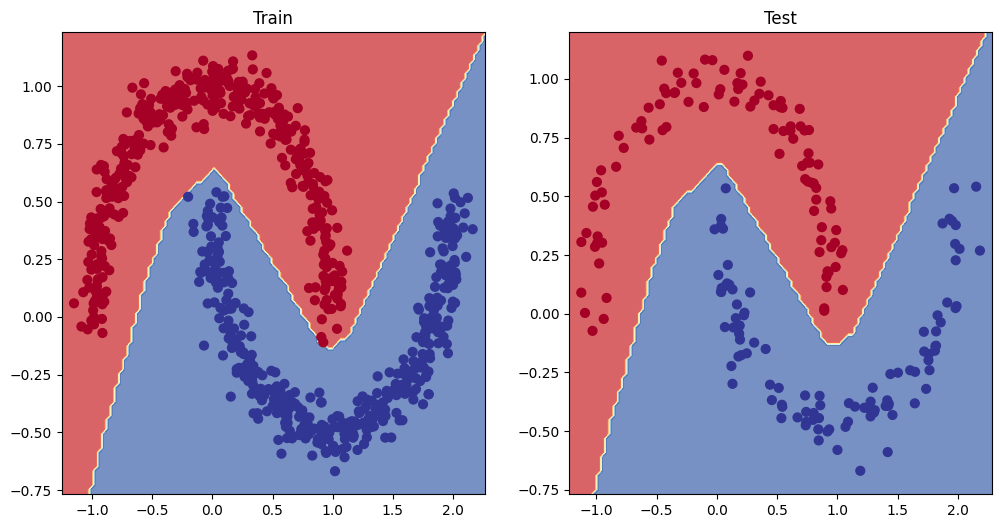

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

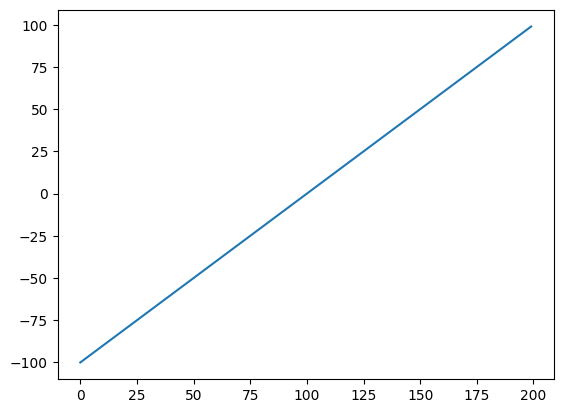

In [ ]:
# Create a straight line tensor
tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)
plt.show()

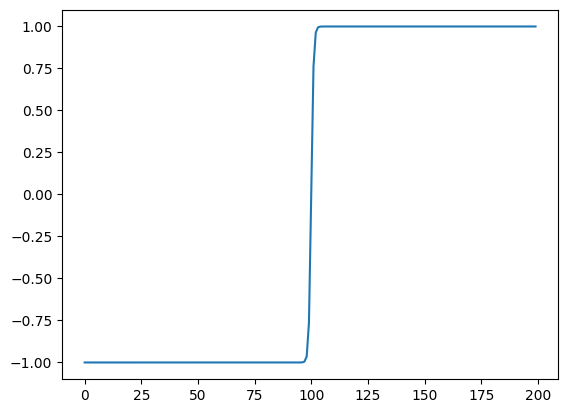

In [ ]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(tensor_A))
plt.show()

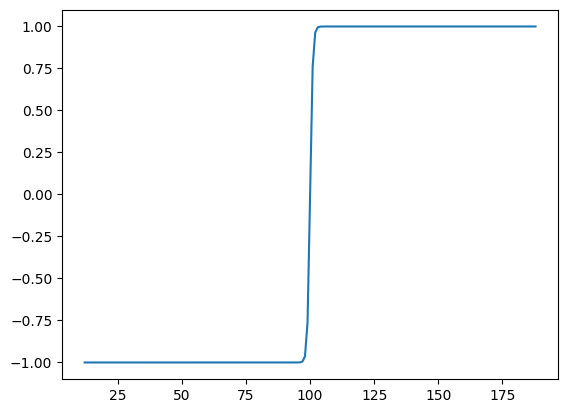

In [ ]:
# Replicate torch.tanh() and plot it
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
plt.plot(tanh(tensor_A))
plt.show()

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

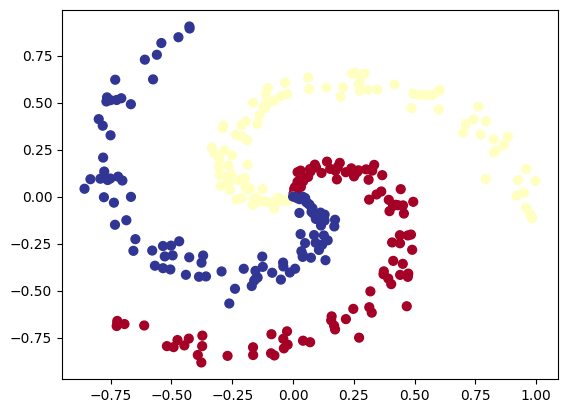

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [ ]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

# TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [ ]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

# Instantiate model and send it to device
model_1 = SpiralModelV0().to(device)
model_1

SpiralModelV0(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299],
        [0.2653, 0.3123, 0.4224],
        [0.2653, 0.3123, 0.4224],
        [0.2659, 0.3127, 0.4214],
        [0.2681, 0.3136, 0.4184],
        [0.2614, 0.3072, 0.4314]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Build a training loop for the model
epochs = 1000
# Loop over data
for epoch in range(epochs+1):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn (y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f} | Test Loss: {test_loss:.2f}, Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 1.12, Acc: 0.32 | Test Loss: 1.10, Test Accuracy: 0.37
Epoch: 100 | Loss: 0.45, Acc: 0.78 | Test Loss: 0.53, Test Accuracy: 0.68
Epoch: 200 | Loss: 0.12, Acc: 0.96 | Test Loss: 0.09, Test Accuracy: 0.98
Epoch: 300 | Loss: 0.07, Acc: 0.98 | Test Loss: 0.02, Test Accuracy: 1.00
Epoch: 400 | Loss: 0.05, Acc: 0.98 | Test Loss: 0.01, Test Accuracy: 1.00
Epoch: 500 | Loss: 0.04, Acc: 0.99 | Test Loss: 0.01, Test Accuracy: 1.00
Epoch: 600 | Loss: 0.03, Acc: 0.99 | Test Loss: 0.01, Test Accuracy: 1.00
Epoch: 700 | Loss: 0.03, Acc: 0.99 | Test Loss: 0.00, Test Accuracy: 1.00
Epoch: 800 | Loss: 0.02, Acc: 0.99 | Test Loss: 0.00, Test Accuracy: 1.00
Epoch: 900 | Loss: 0.02, Acc: 0.99 | Test Loss: 0.00, Test Accuracy: 1.00
Epoch: 1000 | Loss: 0.02, Acc: 0.99 | Test Loss: 0.00, Test Accuracy: 1.00


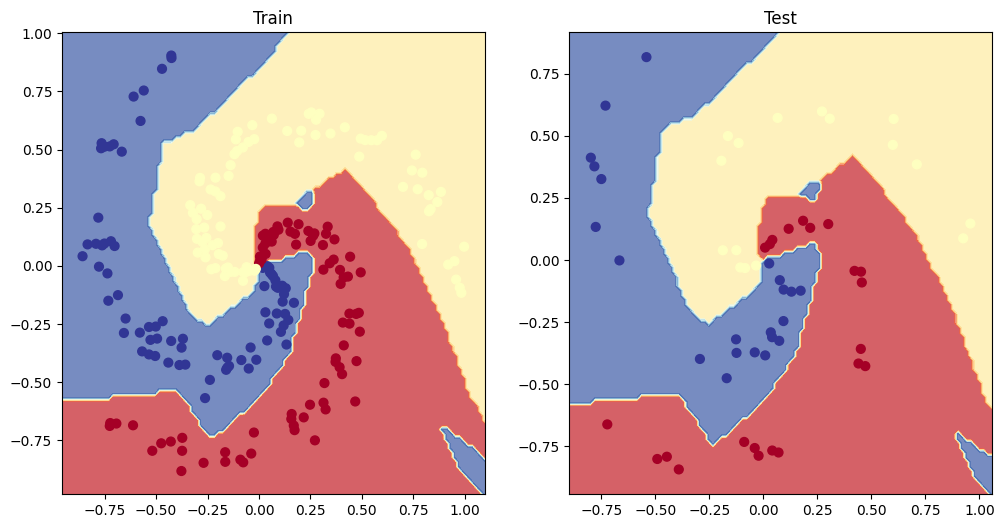

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

#### Manan Kumar